In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
# Data_1=pd.read_csv("ffa1.csv")
# Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
# Data_1.set_index("Date",inplace=True)


In [4]:
# Data_2=pd.read_csv("ffa2.csv")
# Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
# Data_2.set_index("Date",inplace=True)
# Data_3=pd.read_csv("ffa3.csv")
# Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
# Data_3.set_index("Date",inplace=True)

In [5]:
Value8=pd.read_csv("Clarkson_Final_2025.csv")
Value8["Date"]=pd.to_datetime(Value8["Date"],dayfirst=True)

In [6]:
Value8= (Value8.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [7]:
Value8.drop("Unnamed: 0",inplace=True,axis=1)

In [8]:
Value8.set_index("Date",inplace=True)

In [9]:
Value8m=Value8.resample("W-SUN").mean()

In [14]:
Value8m=Value8m.fillna(method="ffill")

In [15]:
Data_R1=pd.read_csv("refinitiv_out_old.csv")
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])
Data_R1["Date"]=Data_R1["Date"].dt.date
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])


Data_R2=pd.read_csv("refinitiv_out1.csv")
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])
Data_R2["Date"]=Data_R2["Date"].dt.date
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])

Data_P1=pd.read_csv("platts_1.csv")

Data_P1["Date"]=Data_P1["assessDate"]

Data_P1.drop("assessDate",axis=1,inplace=True)

Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])
Data_P1["Date"]=Data_P1["Date"].dt.date


Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])

Data_P2=pd.read_csv("platts.csv")

Data_P2["Date"]=Data_P2["assessDate"]

Data_P2.drop("assessDate",axis=1,inplace=True)

Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])
Data_P2["Date"]=Data_P2["Date"].dt.date
Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])

Data_P2["Date"].dtype

Data_P3=pd.read_csv("platts_new.csv")

Data_P3["Date"]=Data_P3["assessDate"]

Data_P3.drop("assessDate",axis=1,inplace=True)


Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])
Data_P3["Date"]=Data_P3["Date"].dt.date
Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])

Data_A=pd.read_csv("argus_data.csv")
Data_A["Date"]=pd.to_datetime(Data_A["Date"])
Data_A["Date"]=Data_A["Date"].dt.date
Data_A["Date"]=pd.to_datetime(Data_A["Date"])

Data_A["Date"]

Data_A2=pd.read_csv("Argus_New_Data.csv")
Data_A2.rename(columns={"PUBLICATION_DATE":"Date"},inplace=True)

Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])
Data_A2["Date"]=Data_A2["Date"].dt.date
Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])

Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)
Data_x=pd.concat([Data_2,Data_1,Data_3],axis=0)
Data_x=Data_x.iloc[:,1:]
Data_x.reset_index(inplace=True)
Data_x=Data_x.drop_duplicates()


ffa= Data_x.loc[:,~Data_x.columns.duplicated()]


Data_P2= Data_P2.set_index('Date',)
Data_R1= Data_R1.set_index('Date') 
Data_P1= Data_P1.set_index('Date')
Data_P3= Data_P3.set_index('Date')
Data_R2= Data_R2.set_index('Date')
Data_A= Data_A.set_index('Date')
Data_A2= Data_A2.set_index('Date')
ffa= ffa.set_index('Date')

Data_l=pd.concat([Data_P2,Data_P1,Data_P3,Data_R1,Data_R2,Data_A,Data_A2,ffa],axis=1)




In [16]:
Data_l.reset_index(inplace=True)
Data_F = (Data_l.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [17]:
Data_F["Date"]=pd.to_datetime(Data_F["Date"],dayfirst=True)

In [18]:
Data_F.head(2)

Date  AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  AAXJJ03  \
0 2018-02-01     4.61   89.092    185.5  196.075    79.00  34925.0   520.29   
1 2018-02-02     4.54   89.092    190.0  196.075    79.15  34925.0   520.29   

   AAXJL03  AAXRQ03  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  \
0   614.41    365.0  ...   13830.0   14830.0   16790.0     16520.0   
1   614.41    365.0  ...   13950.0   14970.0   16870.0     16575.0   

   5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
0     15530.0     15140.0     15000.0     15010.0     15490.0     15530.0  
1     15520.0     15160.0     15010.0     15020.0     15510.0     15540.0  

[2 rows x 10493 columns]

In [19]:
Data=Data_F.drop_duplicates()

In [20]:
Data.shape

(2142, 10493)

In [21]:
Data_F.shape

(2142, 10493)

In [22]:
Data_F.set_index("Date",inplace=True)

In [23]:
Data_F.head(10)

AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  AAXJJ03  \
Date                                                                        
2018-02-01     4.61   89.092    185.5  196.075    79.00  34925.0   520.29   
2018-02-02     4.54   89.092    190.0  196.075    79.15  34925.0   520.29   
2018-02-03     4.54   89.092    190.0  196.075    79.15  34925.0   520.29   
2018-02-04     4.54   89.092    190.0  196.075    79.15  34925.0   520.29   
2018-02-05     4.42   89.092    191.0  196.075    77.55  34925.0   520.29   
2018-02-06     4.41   89.092    194.0  196.075    75.10  34925.0   520.29   
2018-02-07     4.33   89.092    194.0  196.075    74.50  34925.0   520.29   
2018-02-08     4.31   89.092    194.5  196.075    72.90  34925.0   520.29   
2018-02-09     4.38   89.092    195.5  196.075    72.70  34925.0   520.29   
2018-02-10     4.38   89.092    195.5  196.075    72.70  34925.0   520.29   

            AAXJL03  AAXRQ03  AAXWC03  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  \
Date                                   ...                                 
2018-02-01   614.41    365.0    321.0  ...   13830.0   14830.0   16790.0   
2018-02-02   614.41    365.0    321.0  ...   13950.0   14970.0   16870.0   
2018-02-03   614.41    365.0    321.0  ...   13950.0   14970.0   16870.0   
2018-02-04   614.41    365.0    321.0  ...   13950.0   14970.0   16870.0   
2018-02-05   614.41    365.0    321.0  ...   14060.0   15080.0   16970.0   
2018-02-06   614.41    365.0    321.0  ...   14240.0   15180.0   17070.0   
2018-02-07   614.41    365.0    321.0  ...   14380.0   15260.0   17200.0   
2018-02-08   614.41    365.0    321.0  ...   14530.0   15350.0   17330.0   
2018-02-09   614.41    365.0    321.0  ...   14560.0   15400.0   17360.0   
2018-02-10   614.41    365.0    321.0  ...   14560.0   15400.0   17360.0   

            5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
Date                                                                     
2018-02-01     16520.0     15530.0     15140.0     15000.0     15010.0   
2018-02-02     16575.0     15520.0     15160.0     15010.0     15020.0   
2018-02-03     16575.0     15520.0     15160.0     15010.0     15020.0   
2018-02-04     16575.0     15520.0     15160.0     15010.0     15020.0   
2018-02-05     16790.0     15640.0     15210.0     15030.0     15030.0   
2018-02-06     16940.0     15730.0     15270.0     15160.0     15150.0   
2018-02-07     17040.0     15740.0     15250.0     15180.0     15190.0   
2018-02-08     17090.0     15910.0     15310.0     15220.0     15220.0   
2018-02-09     17140.0     15960.0     15332.0     15250.0     15250.0   
2018-02-10     17140.0     15960.0     15332.0     15250.0     15250.0   

            5TC_C+6CAL  5TC_C+7CAL  
Date                                
2018-02-01     15490.0     15530.0  
2018-02-02     15510.0     15540.0  
2018-02-03     15510.0     15540.0  
2018-02-04     15510.0     15540.0  
2018-02-05     15520.0     15540.0  
2018-02-06     15530.0     15550.0  
2018-02-07     15540.0     15560.0  
2018-02-08     15570.0     15590.0  
2018-02-09     15570.0     15590.0  
2018-02-10     15570.0     15590.0  

[10 rows x 10492 columns]

In [24]:
Data_2= Data_F.loc[:,~Data_F.columns.duplicated()]

In [25]:
Data_2.shape

(2142, 9753)

In [26]:
Data_W=Data_2.resample("W-Sun").mean()


In [27]:
# Data_W=Data_2

In [28]:
# Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [29]:
Data_W.tail()

AATIV00    AAVUW03     AAWWR00     AAWWR03    AAXEX00  \
Date                                                                 
2023-11-19  3.052857  97.076000  253.714286  256.364000  92.442857   
2023-11-26  2.950000  97.076000  263.000000  256.364000  94.578571   
2023-12-03  3.017143  95.913286  266.000000  262.997429  92.350000   
2023-12-10  3.202857  94.363000  272.714286  271.842000  93.142857   
2023-12-17  3.320000  94.363000  276.333333  271.842000  90.233333   

                 AAXJI03     AAXJJ03     AAXJL03     AAXRQ03     AAXWC03  ...  \
Date                                                                      ...   
2023-11-19  54200.000000  569.380000  600.490000  409.000000  330.000000  ...   
2023-11-26  54200.000000  569.380000  600.490000  409.000000  330.000000  ...   
2023-12-03  54103.571429  557.084286  596.217143  412.128571  339.857143  ...   
2023-12-10  53975.000000  540.690000  590.520000  416.300000  353.000000  ...   
2023-12-17  53975.000000  540.690000  590.520000  416.300000  353.000000  ...   

                5TC_C+4Q      5TC_C+5Q      5TC_C+6Q    5TC_C+1CAL  \
Date                                                                 
2023-11-19  17547.000000   9878.000000  14547.142857  14723.571429   
2023-11-26  18324.714286  10571.571429  15038.857143  15697.000000   
2023-12-03  19557.000000  11683.714286  15867.428571  17271.285714   
2023-12-10  19264.285714  11577.142857  15561.285714  16540.571429   
2023-12-17  19775.000000  11952.666667  15793.000000  17128.333333   

              5TC_C+2CAL    5TC_C+3CAL    5TC_C+4CAL    5TC_C+5CAL  \
Date                                                                 
2023-11-19  14900.571429  15744.857143  15825.857143  15819.857143   
2023-11-26  15616.000000  15929.714286  15956.142857  15924.285714   
2023-12-03  16540.000000  16490.857143  16462.714286  16347.857143   
2023-12-10  16108.000000  16410.000000  16416.428571  16381.571429   
2023-12-17  16341.666667  16565.666667  16558.666667  16478.666667   

              5TC_C+6CAL    5TC_C+7CAL  
Date                                    
2023-11-19  15823.571429  15808.000000  
2023-11-26  15883.714286  15872.714286  
2023-12-03  16190.857143  16181.714286  
2023-12-10  16275.428571  16276.428571  
2023-12-17  16362.000000  16350.000000  

[5 rows x 9753 columns]

In [30]:
Data_new=Data_W

In [31]:
Data_new.isnull().sum()

AATIV00       0
AAVUW03       0
AAWWR00       0
AAWWR03       0
AAXEX00       0
             ..
5TC_C+3CAL    0
5TC_C+4CAL    0
5TC_C+5CAL    0
5TC_C+6CAL    0
5TC_C+7CAL    0
Length: 9753, dtype: int64

In [61]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)



Tag_f=Target.resample("W-SUN").mean()

Tag_f.isnull().sum()

Value                                      0
Value_fshift_3                             0
Value_fshift_7                             0
Value_fshift_14                            0
Value_fshift_21                            0
                                          ..
Avg_Valuest_rollm_210-Valuest_rollm_49     0
Avg_Valuest_rollm_210-Valuest_rollm_63     0
Avg_Valuest_rollm_210-Valuest_rollm_90     0
Avg_Valuest_rollm_210-Valuest_rollm_120    0
Avg_Valuest_rollm_210-Valuest_rollm_180    0
Length: 387, dtype: int64

In [62]:
Data_new.head(2)

AATIV00  AAVUW03     AAWWR00  AAWWR03    AAXEX00  AAXJI03  \
Date                                                                     
2018-02-04  4.557500   89.092  188.875000  196.075  79.112500  34925.0   
2018-02-11  4.372857   89.092  194.285714  196.075  74.021429  34925.0   

            AAXJJ03  AAXJL03  AAXRQ03  AAXWC03  ...      5TC_C+4Q  \
Date                                            ...                 
2018-02-04   520.29   614.41    365.0    321.0  ...  13920.000000   
2018-02-11   520.29   614.41    365.0    321.0  ...  14412.857143   

                5TC_C+5Q      5TC_C+6Q  5TC_C+1CAL    5TC_C+2CAL  \
Date                                                               
2018-02-04  14935.000000  16850.000000    16561.25  15522.500000   
2018-02-11  15295.714286  17235.714286    17040.00  15842.857143   

              5TC_C+3CAL    5TC_C+4CAL    5TC_C+5CAL    5TC_C+6CAL  \
Date                                                                 
2018-02-04  15155.000000  15007.500000  15017.500000  15505.000000   
2018-02-11  15290.857143  15191.428571  15191.428571  15552.857143   

              5TC_C+7CAL  
Date                      
2018-02-04  15537.500000  
2018-02-11  15572.857143  

[2 rows x 9753 columns]

In [63]:
Tag_f.fillna(method="ffill",inplace=True)

In [64]:
Tag_f.drop("shift_30",axis=1,inplace=True)

In [65]:
Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [66]:
Tag_f["shift_1"]=Tag_f["Value"].shift(-1)
Tag_f["shift_3"]=Tag_f["Value"].shift(-3)
Tag_f["shift_4"]=Tag_f["Value"].shift(-4)

In [67]:
# Tag_f["shift_2"]=Tag_f["Value"].shift(-2)
l=["shift_1","shift_3","shift_4"]

In [68]:
cor={}
for i in range(len(Tag_f.columns)):   
    cor[Tag_f.columns[i]]=Tag_f["shift_2"].corr(Tag_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [69]:

Imp_f= {k:v for k,v in cor.items() if v>.70 or v<-.63}
len(Imp_f)

37

In [70]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [71]:
keys

['Value',
 'Value_fshift_3',
 'Value_rollm_3',
 'Value_rollm_7',
 'Value_rollm_14',
 'Value_ewm_3',
 'Value_ewm_7',
 'Value_ewm_14',
 'EMA_Diff_28_14_7',
 'EMA_Diff_35_21_14',
 'EMA_Diff_49_28_21',
 'EMA_Diff_70_35_21',
 'EMA_Value_ewm_3-Value_ewm_120',
 'EMA_Value_ewm_3-Value_ewm_150',
 'EMA_Value_ewm_3-Value_ewm_180',
 'EMA_Value_ewm_3-Value_ewm_210',
 'EMA_Value_ewm_14-Value_ewm_180',
 'EMA_Value_ewm_14-Value_ewm_210',
 'EMA_Value_ewm_42-Value_ewm_35',
 'EMA_Value_ewm_54-Value_ewm_21',
 'EMA_Value_ewm_54-Value_ewm_35',
 'EMA_Value_ewm_54-Value_ewm_49',
 'EMA_Value_ewm_70-Value_ewm_7',
 'EMA_Value_ewm_70-Value_ewm_21',
 'EMA_Value_ewm_70-Value_ewm_35',
 'EMA_Value_ewm_100-Value_ewm_7',
 'EMA_Value_ewm_100-Value_ewm_21',
 'EMA_Value_ewm_100-Value_ewm_35',
 'EMA_Value_ewm_150-Value_ewm_7',
 'EMA_Value_ewm_150-Value_ewm_21',
 'EMA_Value_ewm_150-Value_ewm_35',
 'EMA_Value_ewm_210-Value_ewm_7',
 'EMA_Value_ewm_210-Value_ewm_21',
 'shift_2',
 'shift_1',
 'shift_3',
 'shift_4']

In [72]:
Data_new.fillna(method="ffill")

AATIV00    AAVUW03     AAWWR00     AAWWR03    AAXEX00  \
Date                                                                 
2018-02-04  4.557500  89.092000  188.875000  196.075000  79.112500   
2018-02-11  4.372857  89.092000  194.285714  196.075000  74.021429   
2018-02-18  4.305714  89.092000  196.714286  196.075000  77.050000   
2018-02-25  4.265714  89.092000  199.428571  196.075000  82.492857   
2018-03-04  4.355714  82.072000  200.000000  195.637857  79.371429   
...              ...        ...         ...         ...        ...   
2023-11-19  3.052857  97.076000  253.714286  256.364000  92.442857   
2023-11-26  2.950000  97.076000  263.000000  256.364000  94.578571   
2023-12-03  3.017143  95.913286  266.000000  262.997429  92.350000   
2023-12-10  3.202857  94.363000  272.714286  271.842000  93.142857   
2023-12-17  3.320000  94.363000  276.333333  271.842000  90.233333   

                 AAXJI03     AAXJJ03     AAXJL03     AAXRQ03     AAXWC03  ...  \
Date                                                                      ...   
2018-02-04  34925.000000  520.290000  614.410000  365.000000  321.000000  ...   
2018-02-11  34925.000000  520.290000  614.410000  365.000000  321.000000  ...   
2018-02-18  34925.000000  520.290000  614.410000  365.000000  321.000000  ...   
2018-02-25  34925.000000  520.290000  614.410000  365.000000  321.000000  ...   
2018-03-04  35533.571429  521.872857  622.861429  379.857143  337.571429  ...   
...                  ...         ...         ...         ...         ...  ...   
2023-11-19  54200.000000  569.380000  600.490000  409.000000  330.000000  ...   
2023-11-26  54200.000000  569.380000  600.490000  409.000000  330.000000  ...   
2023-12-03  54103.571429  557.084286  596.217143  412.128571  339.857143  ...   
2023-12-10  53975.000000  540.690000  590.520000  416.300000  353.000000  ...   
2023-12-17  53975.000000  540.690000  590.520000  416.300000  353.000000  ...   

                5TC_C+4Q      5TC_C+5Q      5TC_C+6Q    5TC_C+1CAL  \
Date                                                                 
2018-02-04  13920.000000  14935.000000  16850.000000  16561.250000   
2018-02-11  14412.857143  15295.714286  17235.714286  17040.000000   
2018-02-18  14411.428571  15331.428571  17347.142857  16987.142857   
2018-02-25  14810.000000  15717.142857  17700.000000  17555.714286   
2018-03-04  14885.714286  15790.000000  17780.000000  17695.714286   
...                  ...           ...           ...           ...   
2023-11-19  17547.000000   9878.000000  14547.142857  14723.571429   
2023-11-26  18324.714286  10571.571429  15038.857143  15697.000000   
2023-12-03  19557.000000  11683.714286  15867.428571  17271.285714   
2023-12-10  19264.285714  11577.142857  15561.285714  16540.571429   
2023-12-17  19775.000000  11952.666667  15793.000000  17128.333333   

              5TC_C+2CAL    5TC_C+3CAL    5TC_C+4CAL    5TC_C+5CAL  \
Date                                                                 
2018-02-04  15522.500000  15155.000000  15007.500000  15017.500000   
2018-02-11  15842.857143  15290.857143  15191.428571  15191.428571   
2018-02-18  15869.285714  15233.571429  15189.142857  15202.857143   
2018-02-25  16370.000000  15494.285714  15267.142857  15327.142857   
2018-03-04  16537.142857  15525.714286  15255.714286  15302.857143   
...                  ...           ...           ...           ...   
2023-11-19  14900.571429  15744.857143  15825.857143  15819.857143   
2023-11-26  15616.000000  15929.714286  15956.142857  15924.285714   
2023-12-03  16540.000000  16490.857143  16462.714286  16347.857143   
2023-12-10  16108.000000  16410.000000  16416.428571  16381.571429   
2023-12-17  16341.666667  16565.666667  16558.666667  16478.666667   

              5TC_C+6CAL    5TC_C+7CAL  
Date                                    
2018-02-04  15505.000000  15537.500000  
2018-02-11  15552.857143  15572.857143  
2018-02-18  15527.142857  15564.285714  
2018-02-25  15612.857

In [73]:
platts_senti=pd.read_csv("platts_sentiments_shipping.csv")
platts_senti["Date"]=pd.to_datetime(platts_senti["Date"],dayfirst=True)
platts_senti = (platts_senti.set_index('Date')
      .reindex(pd.date_range('02-01-2018', '13-12-2023', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

In [74]:
platts_senti.set_index("Date",inplace=True)

In [75]:
Argus_senti=pd.read_csv("argus_sentiments.csv")
Argus_senti["Date"]=pd.to_datetime(Argus_senti["Date"],dayfirst=True)
Argus_senti = (Argus_senti.set_index('Date')
      .reindex(pd.date_range('02-01-2018', '13-12-2023', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

In [76]:
Argus_senti.set_index("Date",inplace=True)

In [77]:
Argus_senti

Sentiment_Score_Argus
Date                             
2018-02-01              -2.875000
2018-02-02              -2.526316
2018-02-03              -4.000000
2018-02-04                    NaN
2018-02-05              -2.900000
...                           ...
2023-12-09              -3.000000
2023-12-10              -2.333333
2023-12-11              -2.647059
2023-12-12              -2.961538
2023-12-13              -2.727273

[2142 rows x 1 columns]

In [78]:
Argus_senti_M=Argus_senti.resample("W-SUN").mean()

In [79]:
platts_senti_M=platts_senti.resample("W-SUN").mean()

In [80]:
platts_senti_M=platts_senti_M.fillna(0)

In [81]:
Final=pd.concat([Data_new,Tag_f[keys],Argus_senti_M,platts_senti_M,Value8m],axis=1)

In [82]:
Final['Sentiment_Score_Argus']

Date
2018-02-04   -3.133772
2018-02-11   -2.669111
2018-02-18   -2.599784
2018-02-25   -2.735129
2018-03-04   -2.817016
                ...   
2023-11-19   -2.757801
2023-11-26   -3.095471
2023-12-03   -3.130331
2023-12-10   -3.023902
2023-12-17   -2.778623
Freq: W-SUN, Name: Sentiment_Score_Argus, Length: 307, dtype: float64

In [83]:

Final.isnull().sum()

AATIV00        0
AAVUW03        0
AAWWR00        0
AAWWR03        0
AAXEX00        0
              ..
11279195.1     0
10511369.1    35
10510450.1    35
10509789.1    35
10510846.1    35
Length: 10913, dtype: int64

In [84]:
Data_f=Final.iloc[:-2,:]

In [85]:
Data_f.isnull().sum()

AATIV00        0
AAVUW03        0
AAWWR00        0
AAWWR03        0
AAXEX00        0
              ..
11279195.1     0
10511369.1    35
10510450.1    35
10509789.1    35
10510846.1    35
Length: 10913, dtype: int64

In [86]:
Data_f.shape

(305, 10913)

In [87]:
Data_f.dropna(axis=1,inplace=True)

In [88]:
Data_f.shape

(305, 5635)

In [90]:
f_c=list(set(list(Data_f.columns))-set(l))

In [91]:
f_c.remove("shift_2")

In [92]:
f_c[-10:]

['10509',
 '19134',
 'MCBAA00',
 '10281',
 '20624',
 'PFAKNSZ',
 'SP4SDMM',
 '14440',
 'CCXIC03',
 '21059']

In [93]:

cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_2"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [94]:
Data_f["shift_2"].corr(Data_f['Sentiment_Score_Argus'])

-0.057466542129190994

In [95]:
Data_f.shape

(305, 5635)

In [96]:
Imp_f= {k:v for k,v in cor.items() if v>.60 or v<-.60}
len(Imp_f)

282

In [97]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [98]:
sorted_dict

{'shift_2': 1.0,
 'shift_1': 0.9435457668124184,
 '534534': 0.8632503205401952,
 '97166': 0.8460877445494601,
 'MRYAA03': 0.8444242053589952,
 '533148': 0.8436081436177997,
 'MRYAA00': 0.8384983613423211,
 'Value': 0.836658620389399,
 '534544': 0.8366463160578657,
 '534539': 0.8364911614020735,
 '533248': 0.8341874221064289,
 '532761': 0.8319642605225132,
 'BCAPESI': 0.8319624216708994,
 '533252': 0.8301957751326148,
 '533212': 0.8255896506180936,
 '5TC_C+1MON': 0.8226823673977741,
 'CALTSOA': 0.8197013977075642,
 'NTLLTSO': 0.8176161512990402,
 '530828': 0.81613486870815,
 '533200': 0.816102596023731,
 '541278': 0.8140760041420108,
 '541270': 0.8140760022801738,
 'Value_rollm_3': 0.8134723349816895,
 '541226': 0.8065664132970558,
 '534535': 0.8060013553997086,
 'BALTICF': 0.805087961482485,
 '534529': 0.8023235262023305,
 '541222': 0.8019652241684105,
 '8857': 0.801649499937513,
 '528972': 0.8009280018196695,
 '22508': 0.8006705060751416,
 'MRYBA03': 0.7996734556487869,
 '533152': 0.7

In [99]:
Data_f=Data_f[keys]

In [67]:
Data_f.shape

(305, 281)

In [68]:
f_c=list(Data_f.columns)

f_c.remove("shift_2")

In [69]:
len(f_c)

280

In [70]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [71]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [72]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [73]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [74]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [329]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

KeyboardInterrupt: 

In [75]:
Data_f.reset_index(inplace=True)

In [76]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [77]:
Data_f.head()

Date   CIBCR00   CIBCR03   CIGAJ00   CIGAJ03   CIIEI03    CIQNC00  \
0 2018-02-04  7.900000  8.184000  8.825000  9.000000  7.729000  10.550000   
1 2018-02-11  8.328571  8.184000  9.328571  9.000000  7.729000  11.828571   
2 2018-02-18  8.571429  8.184000  8.628571  9.000000  7.729000  12.428571   
3 2018-02-25  8.164286  8.184000  9.121429  9.000000  7.729000  12.257143   
4 2018-03-04  7.571429  7.297714  8.942857  8.781143  8.238714  11.957143   

        CRYAA00       CRYAA03       CRYAC00  ...  534549_Delta_1_3  \
0  11243.500000  13061.000000  10801.250000  ...               NaN   
1  13641.714286  13061.000000   9959.142857  ...               NaN   
2  14845.000000  13061.000000   9723.000000  ...               NaN   
3  13021.428571  13061.000000  11429.428571  ...          1.846179   
4  10943.571429   9671.285714  12148.571429  ...          0.309286   

   534549_Delta_1_4  534549_Delta_2_3  534549_Delta_2_4  week_of_month  week  \
0               NaN               NaN               NaN              1     5   
1               NaN               NaN               NaN              2     6   
2               NaN               NaN               NaN              3     7   
3               NaN          1.353607               NaN              4     8   
4          1.662893          0.492571          1.846179              1     9   

   Month  Day of Week  Year  Day  
0      2            6  2018    4  
1      2            6  2018   11  
2      2            6  2018   18  
3      2            6  2018   25  
4      3            6  2018    4  

[5 rows x 7565 columns]

In [78]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [79]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [80]:
Data_f.set_index("Date",inplace=True)

In [81]:
Data_f=Data_f.iloc[8:,:]

In [82]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [83]:
Data_f.fillna(method="ffill",inplace=True)

In [84]:
Data_f.isnull().sum()

CIBCR00        0
CIBCR03        0
CIGAJ00        0
CIGAJ03        0
CIIEI03        0
              ..
week           0
Month          0
Day of Week    0
Year           0
Day            0
Length: 7564, dtype: int64

In [85]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_2"].corr(Data_f.iloc[:,i])

In [86]:
Imp_f= {k:v for k,v in cor.items() if v>=.75 or v<=-.75}
len(Imp_f)

103

In [87]:
sorted_dict

{'shift_2': 1.0,
 '534534': 0.8632503205401952,
 '97166': 0.8460877445494601,
 'MRYAA03': 0.8444242053589952,
 '533148': 0.8436081436177997,
 'MRYAA00': 0.8384983613423211,
 'Value': 0.836658620389399,
 '534544': 0.8366463160578657,
 '534539': 0.8364911614020735,
 '533248': 0.8341874221064289,
 '532761': 0.8319642605225132,
 'BCAPESI': 0.8319624216708994,
 '533252': 0.8301957751326148,
 '533212': 0.8255896506180936,
 '5TC_C+1MON': 0.8226823673977741,
 'CALTSOA': 0.8197013977075642,
 'NTLLTSO': 0.8176161512990402,
 '530828': 0.81613486870815,
 '533200': 0.816102596023731,
 '541278': 0.8140760041420108,
 '541270': 0.8140760022801738,
 'Value_rollm_3': 0.8134723349816895,
 '541226': 0.8065664132970558,
 '534535': 0.8060013553997086,
 'BALTICF': 0.805087961482485,
 '534529': 0.8023235262023305,
 '541222': 0.8019652241684105,
 '8857': 0.801649499937513,
 '528972': 0.8009280018196695,
 '22508': 0.8006705060751416,
 'MRYBA03': 0.7996734556487869,
 '533152': 0.7986844632305321,
 '5TC_CCURMON':

In [88]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [89]:
X_Final=Data_f[keys]

In [90]:
X_Final.fillna(method="ffill",inplace=True)

In [91]:
X_Final.shape

(297, 103)

In [92]:
X_Final.tail()

CIGAJ00    CIGAJ03    CDANC00    CDANC03    CDWCC00    CINAK03  \
Date                                                                           
2023-11-05  10.892857  13.030143   9.735714  11.595571  12.571429  14.049429   
2023-11-12  12.292857  12.845000  10.950000  11.431000  13.721429  13.850000   
2023-11-19  12.664286  12.845000  11.285714  11.431000  13.935714  13.850000   
2023-11-26  12.764286  12.845000  11.342857  11.431000  13.950000  13.850000   
2023-12-03  16.342857  13.890714  14.500000  12.353286  17.878571  14.965571   

              CIRWI03       MRYAA00       MRYAA03       MRYBA00  ...  \
Date                                                             ...   
2023-11-05  12.437429  16182.714286  25212.857143  18186.428571  ...   
2023-11-12  12.638000  23924.857143  25038.000000  20718.285714  ...   
2023-11-19  12.638000  25639.714286  25038.000000  22350.285714  ...   
2023-11-26  12.638000  24961.428571  25038.000000  25233.285714  ...   
2023-12-03  13.243143  37357.000000  30627.000000  41114.142857  ...   

            533212_rollm_3  533248_rollm_3  534534_rollm_3  534534_rollm_4  \
Date                                                                         
2023-11-05    24344.153466    18880.815723    18257.619048    19710.178571   
2023-11-12    21260.647197    15669.845816    16500.285714    18495.214286   
2023-11-19    21561.009539    16134.076108    17889.333333    17795.392857   
2023-11-26    24864.814474    19868.741137    20762.238095    18766.500000   
2023-12-03    29780.627034    25209.089899    25310.047619    23784.535714   

            532761_rollm_3  534539_rollm_3  534544_rollm_3   97166_ewm_3  \
Date                                                                       
2023-11-05     2773.857143    16807.619048    23005.285714  16631.775876   
2023-11-12     2401.952381    13961.666667    19920.761905  15911.331907   
2023-11-19     2396.047619    13365.238095    19871.190476  16674.570359   
2023-11-26     2693.666667    15135.952381    22339.142857  17827.356341   
2023-12-03     3648.952381    21105.476190    30261.333333  20441.945827   

            533148_ewm_3  534534_ewm_3  
Date                                    
2023-11-05  17631.775876  17928.593646  
2023-11-12  16911.331907  18248.445235  
2023-11-19  17674.570359  19106.512497  
2023-11-26  18827.356341  19679.384373  
2023-12-03  21441.945827  22972.395423  

[5 rows x 103 columns]

In [93]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [94]:
Data_f.columns

Index(['CIBCR00', 'CIBCR03', 'CIGAJ00', 'CIGAJ03', 'CIIEI03', 'CIQNC00',
       'CRYAA00', 'CRYAA03', 'CRYAC00', 'CRYAC03',
       ...
       '534549_Delta_1_3', '534549_Delta_1_4', '534549_Delta_2_3',
       '534549_Delta_2_4', 'week_of_month', 'week', 'Month', 'Day of Week',
       'Year', 'Day'],
      dtype='object', length=7564)

In [95]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [96]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [97]:
X_Final.fillna(method="ffill",inplace=True)

In [98]:
Tag_f.head

<bound method NDFrame.head of                    Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                        
2018-02-04  11473.000000    13765.750000    13102.750000     16777.500000   
2018-02-11  13037.142857    11860.857143    13415.000000     12370.000000   
2018-02-18  13103.142857    13765.428571    11963.428571     13679.571429   
2018-02-25  13241.142857    12803.142857    13668.000000     11874.000000   
2018-03-04  12632.000000    13078.000000    12947.142857     13536.142857   
...                  ...             ...             ...              ...   
2023-11-19  22164.000000    20994.857143    18618.428571     20356.285714   
2023-11-26  24336.428571    21879.428571    21300.571429     17643.714286   
2023-12-03  44283.571429    29422.142857    21284.714286     20899.428571   
2023-12-10  41072.571429    48959.714286    34571.714286     22149.142857   
2023-12-17  36756.000000    37658.000000    50

In [99]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [100]:
X_Final.dropna(thresh=204,axis=1,inplace=True)

In [101]:
X_Final["senti_argus"]=Final['Sentiment_Score_Argus']
X_Final["senti_platts"]=Final['Snetiment_Score_Platts']

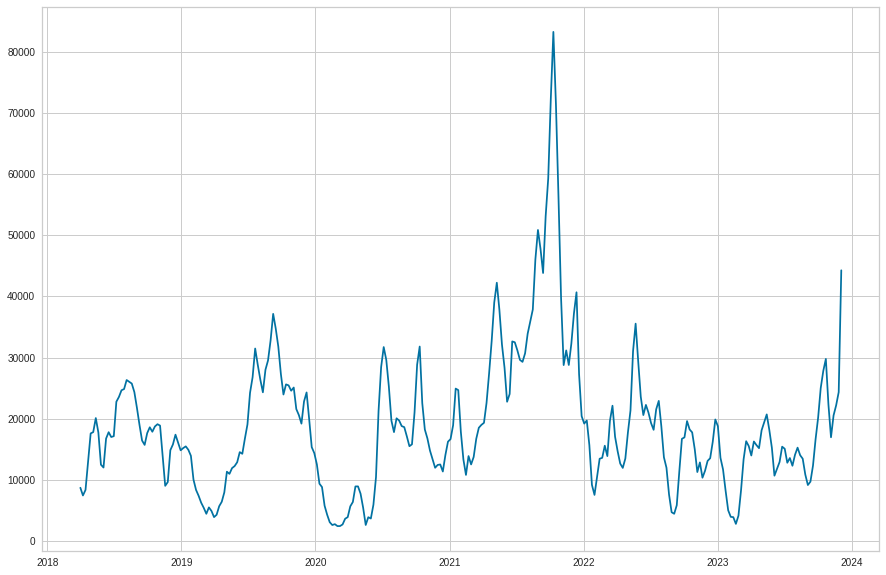

In [103]:
plt.figure(figsize=(15,10))
plt.plot(X_Final["Value"])

In [589]:
X_Final.columns

Index(['CIGAJ00', 'CIGAJ03', 'CDANC00', 'CDANC03', 'CDWCC00', 'CINAK03',
       'CIRWI03', 'MRYAA00', 'MRYAA03', 'MRYBA00',
       ...
       '532761_rollm_3', '534539_rollm_3', '534544_rollm_3', '97166_ewm_3',
       '533148_ewm_3', '534534_ewm_3', 'Month', 'week', 'senti_argus',
       'senti_platts'],
      dtype='object', length=107)

In [590]:
exp_reg102 = setup(data =X_Final.iloc[:X_Final.shape[0]-50,:], target = 'shift_2', session_id=124,normalize=True,remove_multicollinearity=True,multicollinearity_threshold=.95) 

In [592]:
get_config('dataset_transformed')

MRYAA03   BALTICF   NTLLTSO  5TC_C+1MON  5TC_CCURQ  \
Date                                                              
2019-03-24 -1.524414 -1.150558 -0.990323   -1.305317  -1.417119   
2022-05-29  0.889293  1.366197  1.403145    1.308465   0.624632   
2019-11-24  0.401370 -0.497901 -0.004447    0.080499   0.112125   
2020-04-05 -1.148736 -1.251909 -1.730079   -1.147982  -1.139971   
2018-05-27 -0.420590 -0.667987 -0.194057   -0.611825  -0.429277   
...              ...       ...       ...         ...        ...   
2019-12-29  0.176666 -0.715241 -0.792307   -0.850351  -0.663972   
2021-05-23  1.898666  1.232228  1.473198    1.595744   1.438395   
2018-06-17 -0.440723 -0.348341  0.078682   -0.271459  -0.228166   
2021-04-04  0.652522  0.391507  0.283703    0.404323   0.274243   
2021-02-21 -0.879802 -0.104907 -0.603632   -0.572184  -0.299515   

            EMA_Diff_28_14_7  EMA_Value_ewm_3-Value_ewm_210    533220  \
Date                                                                    
2019-03-24          1.195231                      -0.925587 -1.326389   
2022-05-29         -1.144556                       0.658718  1.990499   
2019-11-24         -0.028638                       0.077184  0.506496   
2020-04-05          1.245638                      -1.016044 -1.095311   
2018-05-27          0.152337                       0.049681 -0.399576   
...                      ...                            ...       ...   
2019-12-29          0.256602                      -0.347426  0.065174   
2021-05-23         -1.599678                       1.476790  1.281154   
2018-06-17          0.179680                       0.218791 -0.214646   
2021-04-04          0.033546                       0.203352  0.165871   
2021-02-21          0.464444                      -0.359869 -0.973310   

              534534     Month      week  senti_argus  senti_platts  \
Date                                                                  
2019-03-24 -1.127332 -1.029695 -0.980739    -0.851521      1.253296   
2022-05-29  0.704476 -0.437362 -0.369800    -0.239373     -0.675008   
2019-11-24  0.345179  1.339636  1.395136     0.141029      1.253296   
2020-04-05 -0.946587 -0.733528 -0.844975    -1.871779     -1.153632   
2018-05-27 -0.424565 -0.437362 -0.369800     0.911321      1.253296   
...              ...       ...       ...          ...           ...   
2019-12-29 -0.615341  1.635803  1.734546    -1.441944     -1.391219   
2021-05-23  1.613314 -0.437362 -0.437682    -0.256235     -0.450947   
2018-06-17 -0.105878 -0.141196 -0.166153     0.752553      1.253296   
2021-04-04  0.366035 -0.733528 -0.912857    -0.408434     -0.945569   
2021-02-21 -0.579908 -1.325861 -1.320149     0.132965     -1.212120   

                 shift_2  
Date                      
2019-03-24   4243.856934  
2022-05-29  20573.142578  
2019-11-24  24278.857422  
2020-04-05   8884.428711  
2018-05-27  16722.714844  
...                  ...  
2019-12-29   9334.000000  
2021-05-23  22754.000000  
2018-06-17  17117.142578  
2021-04-04  27396.857422  
2021-02-21  13713.857422  

[247 rows x 14 columns]

In [190]:
compare_models()

Initiated  . . . . . . . . . . . . . . . . . .          14:41:27
Status     . . . . . . . . . . . . . . . . . .  Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Ridge Regression

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1595, in _get_outputs
    yield from self._retrieve()
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/joblib/parallel.py", line 1707, in _retrieve
    time.sleep(0.01)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-190-9ff5ccfe3077>", line 1, in <module>
    compare_models()
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/pycaret/utils/generic.py", line 965, in wrapper
    return func(*args, **kwargs)
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/pycaret/regression/functional.py", line 805, in compare_models
    return _CURRENT_EXPERIMENT.compare_models(
  File "/home/ggjps080

TypeError: object of type 'NoneType' has no len()

In [593]:
par=create_model("et")

In [ ]:
ensemble_out=ensemble_model(par, n_estimators=100, choose_better=True) 


In [594]:
final_model = finalize_model(par)
pred2 = predict_model(final_model, data=X_Final.iloc[X_Final.shape[0]-50:,:])

In [595]:
X_Final.iloc[X_Final.shape[0]-51,:]

CIGAJ00            11.221429
CIGAJ03            11.212000
CDANC00             9.964286
CDANC03             9.938000
CDWCC00            12.707143
                    ...     
534534_ewm_3    12099.660172
Month              12.000000
week               50.000000
senti_argus        -2.956942
senti_platts       -3.551190
Name: 2022-12-18 00:00:00, Length: 107, dtype: float64

In [480]:
import numpy as np

def make_future_predictions(model, initial_input, timesteps, num_predictions):
    # Initialize an array to store future predictions
    future_predictions = []
    
    # Initialize the input sequence with the initial_input
    current_input = initial_input
    
    # Iterate for the number of predictions needed
    for _ in range(num_predictions):
        # Reshape current input to match model's input shape
        current_input = np.array(current_input).reshape(1, timesteps, -1)
        
        # Predict the next value
        next_prediction = predict_model(final_model
        
        # Append the prediction to the list of future predictions
        future_predictions.append(next_prediction[0, 0])  # Assuming the model returns a single prediction
        
        # Update the input sequence by removing the oldest entry and appending the newest prediction
        current_input = np.append(current_input[:, 1:, :], np.tile(next_prediction, (1, 1, current_input.shape[-1])), axis=1)


    
    return future_predictions

initial_input = X_val[-1]  


future_predictions = make_future_predictions(model, initial_input, timesteps, num_predictions=2)

print(future_predictions)


SyntaxError: invalid syntax (<ipython-input-480-05e23a5bc545>, line 19)

In [596]:
Res=pred2.iloc[:,-2:]

Res["diff"]=Res["shift_2"]-Res["prediction_label"]
Res["diff1_V"]=Res["shift_2"].diff(2)



Res["diff1_P"]=Res["prediction_label"].diff(2)

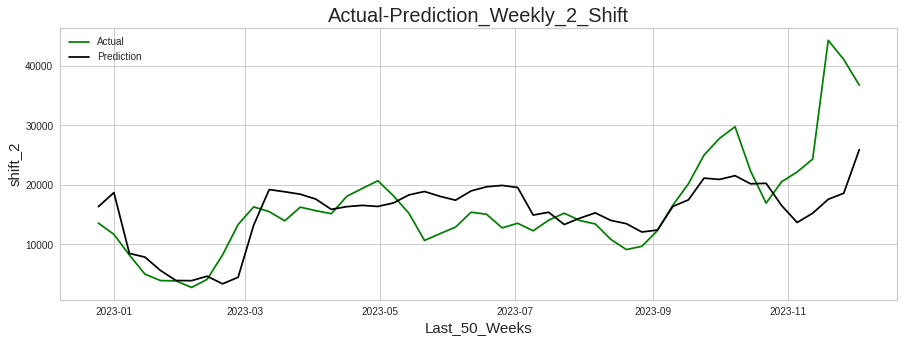

MAPE: 0.2764559450532308
directional_acc= 66.0


In [597]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_2_Shift",fontdict=font1)
plt.plot(Res["shift_2"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_2"].shape[0]):
    Mape.append((np.abs((Res["shift_2"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_2"].iloc[i])))

print("MAPE:",np.mean(Mape))
print("directional_acc=",directional_acc(Res["prediction_label"],Res["shift_2"],Tag_f.Value[-52:-2]))

KeyError: 'shift_4'

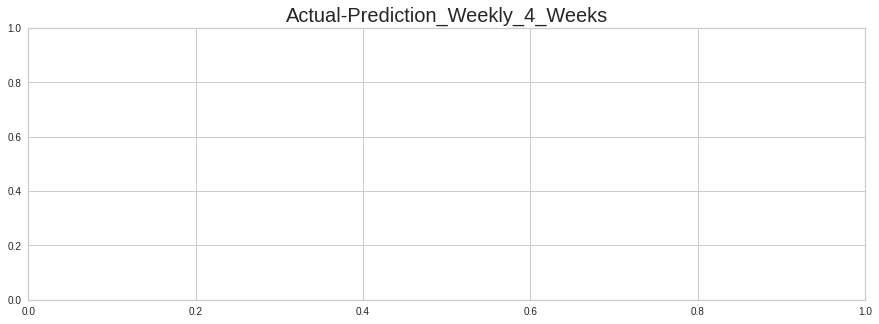

In [319]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [189]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [196]:
directional_acc(Res["prediction_label"],Res["shift_2"],Tag_f.Value[-52:-2])

60.0

In [144]:
Tag_f.Value[-52:-2].head()

Date
2022-12-25    19851.714286
2023-01-01    18749.000000
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
Freq: W-SUN, Name: Value, dtype: float64

In [146]:
Res["prediction_label"].head()

Date
2022-12-25    18819.245771
2023-01-01    16976.185776
2023-01-08    10808.057227
2023-01-15     8804.070061
2023-01-22     6230.188523
Name: prediction_label, dtype: float64

In [1738]:
# Res.to_csv("4_shift_reg_Cape_with_Targ.csv")

In [474]:
X_Final.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_CCURQ', 'Value', 'Value_rollm_3',
       'Value_rollm_7', 'Value_ewm_7', 'EMA_Diff_28_14_7', 'EMA_Diff_35_21_14',
       'EMA_Value_ewm_3-Value_ewm_150', 'EMA_Value_ewm_3-Value_ewm_180',
       'EMA_Value_ewm_3-Value_ewm_210', 'EMA_Value_ewm_150-Value_ewm_7',
       'EMA_Value_ewm_210-Value_ewm_7', 'shift_2', '5TC_C+1MON_fshift_1',
       '5TC_C+1MON_rollm_3', '5TC_C+1MON_rollm_4', '5TC_C+1MON_rollm_6',
       '5TC_CCURQ_rollm_3', '5TC_C+1MON_ewm_3'],
      dtype='object')

In [512]:
Train=X_Final.iloc[:X_Final.shape[0]-50,:]
Test=X_Final.iloc[X_Final.shape[0]-50:,:]


In [513]:
Train.shape

(247, 21)

In [514]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(Train.drop("shift_2",axis=1))

In [515]:
Y_train = np.reshape(np.array(Train.shift_2), (-1,1))
Y_train= scaler.fit_transform(Y_train) 

In [516]:
X_train.shape

Train.shape

Train.shape

(247, 21)

In [517]:
Y_train.shape

(247, 1)

In [518]:
Y_test = np.reshape(np.array(Test.shift_2), (-1,1))
Y_test_S= scaler.fit_transform(Y_test) 

In [519]:
X_test = scaler.fit_transform(Test.drop("shift_2",axis=1))

X_test.shape

(50, 20)

In [520]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from keras.layers import LSTM

model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1],1),activation='tanh'))

# model.add(Dense(units=5))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=True,activation='tanh'))

# model1.add(LSTM(10,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# model = Sequential()

# model.add(LSTM(150,return_sequences=True,kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', batch_input_shape=(1,X_train.shape[1],1), stateful=True))
# model.add(Dropout(0.3))
# model.add(LSTM(25, batch_input_shape=(1,X_train.shape[1],1), kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',stateful=True))
# model.add(Dropout(0.3))
# model.add((Dense(1)))
# model.compile(loss='mse', optimizer='adam')


model.summary()

# from keras.callbacks import ModelCheckpoint,EarlyStopping
# file="weights.best_Baisc.hdf5"
# checkpoint = ModelCheckpoint(file, monitor='loss', verbose=1, save_best_only=True, mode='min')
# early_stop =  EarlyStopping(monitor='loss', min_delta=0.001, patience=200, verbose=1, mode='min')
# callbacks = [checkpoint,early_stop]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 150)           91200     
                                                                 
 lstm_3 (LSTM)               (None, 25)                17600     
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 108826 (425.10 KB)
Trainable params: 108826 (425.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [521]:
X_test_2 = scaler.fit_transform(Test.iloc[:,:])

In [522]:
model.fit(X_train, Y_train, epochs =150, batch_size = 2)

Epoch 1/150
124/124 [==============================] - 8s 31ms/step - loss: 0.0141
Epoch 2/150
124/124 [==============================] - 4s 31ms/step - loss: 0.0104
Epoch 3/150
124/124 [==============================] - 6s 46ms/step - loss: 0.0097
Epoch 4/150
124/124 [==============================] - 6s 50ms/step - loss: 0.0101
Epoch 5/150
124/124 [==============================] - 6s 45ms/step - loss: 0.0091
Epoch 6/150
124/124 [==============================] - 4s 30ms/step - loss: 0.0101
Epoch 7/150
124/124 [==============================] - 4s 30ms/step - loss: 0.0089
Epoch 8/150
124/124 [==============================] - 4s 32ms/step - loss: 0.0100
Epoch 9/150
124/124 [==============================] - 4s 31ms/step - loss: 0.0099
Epoch 10/150
124/124 [==============================] - 4s 29ms/step - loss: 0.0090
Epoch 11/150
124/124 [==============================] - 4s 29ms/step - loss: 0.0093
Epoch 12/150
124/124 [==============================] - 4s 29ms/step - loss: 0.0096
E

In [523]:
y_RNN = model.predict(X_test)


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f58085a78b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f58085a78b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 1s 12ms/step


In [524]:
inv_yhat = np.concatenate( [X_test,y_RNN], axis=1)

In [525]:
# # invert scaling for forecast

Y_Rnn_n = scaler.inverse_transform(inv_yhat)

In [526]:
Y_Rnn_n[:,-1]

array([ 9690.51902835, 10456.25686449, 10226.9831811 ,  9266.58196367,
        8580.65758814,  8335.43085421,  8056.63370671,  7979.88030917,
        8038.09197884,  7925.2894921 , 10555.30642224, 10463.70402304,
       10056.02599768,  9714.36722043, 10378.82233296, 13413.23634548,
       12565.36256673, 12122.52852568, 13079.47419984, 13479.3151961 ,
       15114.97430602, 13775.80193085, 12311.3850446 , 11109.13226078,
       12163.96769792, 11454.64171089, 11058.07534675, 10559.0641853 ,
       10020.62368338, 10319.55394581,  9785.34487162, 10170.58798563,
       10442.20294281, 10222.36521355, 10370.40680889,  9705.14706246,
        9848.09842799, 11116.56890124, 10888.76704929, 10950.09242429,
       10832.43636477, 16462.00369465, 12973.19029957, 12421.98767276,
       11934.31501268, 10606.74794777, 13268.14560037, 14388.34956644,
       15292.83731694, 13398.65266265])

In [527]:
inv_y = np.concatenate( [X_test,Y_test_S], axis=1)
inv_yy=scaler.inverse_transform(inv_y)
inv_yy[:,-1]

array([10541.84082373, 10002.74525503,  9018.26764588,  8108.8498791 ,
        7804.48322986,  7788.01457442,  7477.13329735,  7858.38064768,
        9028.46445465, 10471.91984927, 11312.7924015 , 11088.30075434,
       10649.59519583, 11299.76314585, 11132.00136337, 10988.88186878,
       11818.18185232, 12191.61974195, 12556.07472862, 11839.8298392 ,
       11007.81879936,  9713.87613658, 10037.82713284, 10350.2055604 ,
       11058.84330676, 10962.29733161, 10313.54560504, 10532.49374902,
       10174.18921844, 10682.24926203, 11013.76693781, 10663.43372203,
       10499.51597461,  9766.76196622,  9279.78342014,  9436.41773272,
       10183.9004649 , 11400.96242659, 12414.37145746, 13776.5760901 ,
       14573.90988739, 15130.68801735, 13018.28959624, 11494.39271017,
       12509.66306328, 12976.16706475, 13591.49591812, 19241.41817728,
       18331.91948345, 17109.27355505])

In [528]:
X_test

array([[0.35387593, 0.21992522, 0.28705139, 0.41176248, 0.48632499,
        0.53258564, 0.50821743, 0.47845493, 0.51736702, 0.42493981,
        0.42086232, 0.42081502, 0.58508221, 0.58760421, 0.23194355,
        0.18147131, 0.16467307, 0.17245692, 0.40556549, 0.22025528],
       [0.24148706, 0.09909447, 0.12631804, 0.3852128 , 0.55161627,
        0.58161615, 0.53960679, 0.44483287, 0.48877378, 0.45212587,
        0.44755291, 0.44720621, 0.55285969, 0.55674185, 0.23489439,
        0.14944906, 0.15205612, 0.15183928, 0.30952538, 0.16911394],
       [0.25642042, 0.1139107 , 0.15526492, 0.26050946, 0.51902401,
        0.51336038, 0.49119291, 0.49362276, 0.51090483, 0.35381856,
        0.35176378, 0.35271411, 0.59916875, 0.60100085, 0.10583931,
        0.10720322, 0.13209275, 0.11594288, 0.21518126, 0.13591884],
       [0.25195225, 0.11719642, 0.15665613, 0.2146847 , 0.41706556,
        0.34723892, 0.4186131 , 0.56864044, 0.55311745, 0.25906338,
        0.2591494 , 0.26106226, 0.66615515, 0

Text(0.5, 1.0, 'Basic LSTM_$_Layers_17_neuron each')

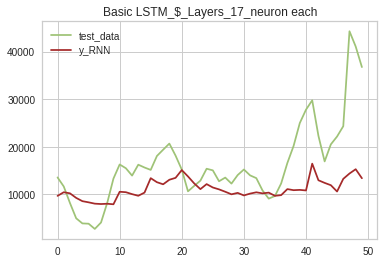

In [532]:
plt.plot(Y_test, label = "test_data", color = "g")
plt.plot(Y_Rnn_n[:,-1], label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_17_neuron each")

In [530]:
Y_Rnn_n[:,-1]

array([ 9690.51902835, 10456.25686449, 10226.9831811 ,  9266.58196367,
        8580.65758814,  8335.43085421,  8056.63370671,  7979.88030917,
        8038.09197884,  7925.2894921 , 10555.30642224, 10463.70402304,
       10056.02599768,  9714.36722043, 10378.82233296, 13413.23634548,
       12565.36256673, 12122.52852568, 13079.47419984, 13479.3151961 ,
       15114.97430602, 13775.80193085, 12311.3850446 , 11109.13226078,
       12163.96769792, 11454.64171089, 11058.07534675, 10559.0641853 ,
       10020.62368338, 10319.55394581,  9785.34487162, 10170.58798563,
       10442.20294281, 10222.36521355, 10370.40680889,  9705.14706246,
        9848.09842799, 11116.56890124, 10888.76704929, 10950.09242429,
       10832.43636477, 16462.00369465, 12973.19029957, 12421.98767276,
       11934.31501268, 10606.74794777, 13268.14560037, 14388.34956644,
       15292.83731694, 13398.65266265])

In [531]:
X_test

array([[0.35387593, 0.21992522, 0.28705139, 0.41176248, 0.48632499,
        0.53258564, 0.50821743, 0.47845493, 0.51736702, 0.42493981,
        0.42086232, 0.42081502, 0.58508221, 0.58760421, 0.23194355,
        0.18147131, 0.16467307, 0.17245692, 0.40556549, 0.22025528],
       [0.24148706, 0.09909447, 0.12631804, 0.3852128 , 0.55161627,
        0.58161615, 0.53960679, 0.44483287, 0.48877378, 0.45212587,
        0.44755291, 0.44720621, 0.55285969, 0.55674185, 0.23489439,
        0.14944906, 0.15205612, 0.15183928, 0.30952538, 0.16911394],
       [0.25642042, 0.1139107 , 0.15526492, 0.26050946, 0.51902401,
        0.51336038, 0.49119291, 0.49362276, 0.51090483, 0.35381856,
        0.35176378, 0.35271411, 0.59916875, 0.60100085, 0.10583931,
        0.10720322, 0.13209275, 0.11594288, 0.21518126, 0.13591884],
       [0.25195225, 0.11719642, 0.15665613, 0.2146847 , 0.41706556,
        0.34723892, 0.4186131 , 0.56864044, 0.55311745, 0.25906338,
        0.2591494 , 0.26106226, 0.66615515, 0

Text(0.5, 1.0, 'Basic LSTM_$_Layers_150_neuron each')

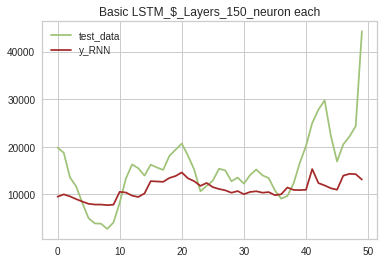

In [506]:
plt.plot(np.array(X_Final["Value"].iloc[-50:]), label = "test_data", color = "g")
plt.plot( Y_Rnn_n[:,-1], label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_150_neuron each")

In [329]:
inv_yhat = np.concatenate( [X_test,y_RNN], axis=1)
inv_yhat

array([[0.58934391, 0.26050946, 0.26237876, ..., 1.        , 0.94117647,
        0.103622  ],
       [0.58934391, 0.2146847 , 0.11244804, ..., 1.        , 0.96078431,
        0.18736932],
       [0.58934391, 0.13100111, 0.        , ..., 1.        , 0.98039216,
        0.22336823],
       ...,
       [0.97625772, 1.        , 0.84737111, ..., 0.90909091, 0.84313725,
        0.43646538],
       [0.96676081, 0.92268984, 0.84737111, ..., 0.90909091, 0.8627451 ,
        0.48331115],
       [0.96676081, 0.81876122, 0.81637862, ..., 0.90909091, 0.88235294,
        0.54861224]])

In [330]:
# # invert scaling for forecast
inv_yhat = np.concatenate( [X_test,Y_Rnn_n[:,-1].reshape(-1,1)], axis=1)
Y_Rnn_n = scaler.inverse_transform(inv_yhat)



In [331]:
Y_Rnn_n[:,0]

array([18089.        , 18089.        , 18089.        , 16945.28571429,
       10083.        , 10083.        , 10083.        , 10083.        ,
        8050.85714286,  7238.        ,  7238.        ,  7238.        ,
       14176.57142857, 16952.        , 16952.        , 16952.        ,
       16338.28571429, 14804.        , 14804.        , 14804.        ,
       14804.        , 18982.        , 18982.        , 18982.        ,
       18982.        , 18043.14285714, 17339.        , 17339.        ,
       17339.        , 16229.28571429, 13455.        , 13455.        ,
       13455.        , 13455.        , 11512.71428571, 11189.        ,
       11189.        , 11189.        , 13509.71428571, 16604.        ,
       16604.        , 16604.        , 17896.28571429, 25650.        ,
       25650.        , 25650.        , 25650.        , 25212.85714286,
       25038.        , 25038.        ])

In [332]:
Tag_f["Value"].iloc[-50:]

Date
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142857
2023-08-27    10833.142857
2023-09-03     9113.857143
2023-09-10     9666.857143
2023-09-17    12305.857

In [333]:
X_Final["Value"].iloc[-50:]

Date
2022-12-11    13507.285714
2022-12-18    16186.142857
2022-12-25    19851.714286
2023-01-01    18749.000000
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142

In [334]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [335]:
directional_acc(pd.DataFrame(Y_Rnn_n[:,-1]).values,pd.DataFrame(Y_test).values,X_Final["Value"].iloc[-50:].values)

2582.0

In [336]:
Mape=[]
for i  in range(len(Y_Rnn_n[:,-1])):
    Mape.append((Y_test[i] - Y_Rnn_n[:,-1][i]) / X_Final["Value"].iloc[-50:][i])

print("MAPE:",np.mean(Mape))

MAPE: -27432.871566582893


In [337]:
pd.DataFrame(Y_Rnn_n[:,-1])

0
0   1.499569e+08
1   2.111037e+08
2   2.373878e+08
3   2.034522e+08
4   1.768357e+08
5   1.811203e+08
6   2.015297e+08
7   1.888777e+08
8   2.246659e+08
9   2.947726e+08
10  3.319687e+08
11  4.378865e+08
12  5.116076e+08
13  5.197210e+08
14  5.571692e+08
15  5.550470e+08
16  5.850797e+08
17  6.080375e+08
18  5.696401e+08
19  4.997347e+08
20  4.218635e+08
21  4.333332e+08
22  4.346303e+08
23  4.073970e+08
24  3.893416e+08
25  3.718315e+08
26  3.465048e+08
27  2.219048e+08
28  1.622459e+08
29  2.448935e+08
30  2.343050e+08
31  2.302978e+08
32  2.035452e+08
33  2.005621e+08
34  1.913361e+08
35  1.941008e+08
36  2.012675e+08
37  1.752382e+08
38  1.819809e+08
39  2.325479e+08
40  2.475317e+08
41  2.535341e+08
42  2.644200e+08
43  2.715394e+08
44  2.853899e+08
45  3.204408e+08
46  3.383167e+08
47  3.929773e+08
48  4.271810e+08
49  4.748596e+08

In [1]:
X_Final

NameError: name 'X_Final' is not defined